# Compare climate data
We are using the HistAlp climate dataset. Here I'd try to assess its usabillity and compare it to actual climate records from the region. Therefore I use monthly precipitation from following stations:
 - Eigergletscher (7°58'/46°35'),  2320 m asl., data from 1908 until 1952
 - Kleine Schneidegg (7°58'/46°35'), 2060 m asl., data since 1960
 - HistAlp (8°05'/46°35'), 2011 m asl., data between 1801 and 2014

In [1]:
# import section
import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline

## Read data
The data is prepared using other scripts/notebooks and therefore just be read via pandas or xarray.

In [13]:
# read the IDAWEB precipitation data
path = '../raw_data/idaweb_precip.csv'
idaweb_df = pd.read_csv(path, index_col=0, parse_dates=True)
idaweb_df.head()

,rre150m0_EIG,rre150m0_KSE
time,,
1908-11-01,120.0,NaN
1908-12-01,94.0,NaN
1909-01-01,117.0,NaN
1909-02-01,75.0,NaN
1909-03-01,174.0,NaN


In [14]:
# read histalp data
dsh = xr.open_dataset('../raw_data/climate_hs.nc')
dsh

<xarray.Dataset>
Dimensions:  (time: 2556)
Coordinates:
  * time     (time) datetime64[ns] 1801-10-01 1801-11-01 1801-12-01 ...
Data variables:
    prcp     (time) float32 ...
    temp     (time) float32 ...
    grad     (time) float32 ...
Attributes:
    ref_hgt:      2011.0
    ref_pix_lon:  8.08333333333175
    ref_pix_lat:  46.58333333333195
    ref_pix_dis:  4406.84932272399
    author:       OGGM
    author_info:  Open Global Glacier Model

In [19]:
# convert precipitation data into DataFrame
histalp_df = dsh.prcp.to_dataframe()
# add both DataFrames
precip_df = pd.concat([idaweb_df, histalp_df], axis=1)
# adjust columns
precip_df.columns = ['eiger', 'schneidegg', 'histalp']
precip_df.head()

,eiger,schneidegg,histalp
time,,,
1801-10-01,NaN,NaN,200.0
1801-11-01,NaN,NaN,184.0
1801-12-01,NaN,NaN,265.0
1802-01-01,NaN,NaN,114.0
1802-02-01,NaN,NaN,202.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x321dbb320>,
      dtype=object)

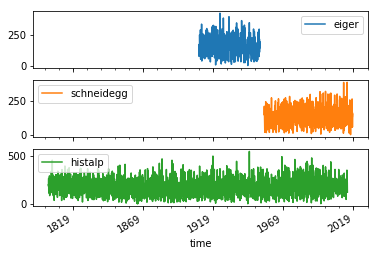

In [20]:
precip_df.plot(subplots=True)

In [28]:
precip_df.describe()

,eiger,schneidegg,histalp
count,522.000000,759.000000,2556.000000
mean,156.371648,132.891436,178.058289
std,74.526888,67.100315,81.872162
min,0.000000,0.100000,4.000000
25%,103.250000,83.250000,120.000000
50%,150.000000,125.000000,174.000000
75%,200.750000,174.500000,229.000000
max,430.000000,390.700000,543.000000


In [23]:
precip_df.corr().histalp

eiger         0.828680
schneidegg    0.724897
histalp       1.000000
Name: histalp, dtype: float64

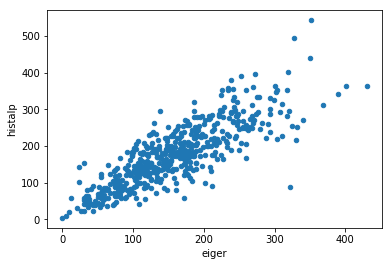

In [26]:
precip_df.plot.scatter('eiger', 'histalp')

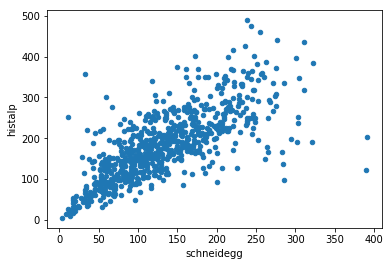

In [27]:
precip_df.plot.scatter('schneidegg', 'histalp')

In [30]:
precip_df[['eiger', 'histalp']].dropna().describe()

,eiger,histalp
count,522.000000,522.000000
mean,156.371648,175.607285
std,74.526888,83.760689
min,0.000000,4.000000
25%,103.250000,118.250000
50%,150.000000,172.000000
75%,200.750000,227.000000
max,430.000000,543.000000


In [31]:
precip_df[['schneidegg', 'histalp']].dropna().describe()

,schneidegg,histalp
count,713.000000,713.000000
mean,133.017532,184.091171
std,67.725175,84.840752
min,4.000000,5.000000
25%,83.000000,123.000000
50%,124.200000,178.000000
75%,176.300000,235.000000
max,390.700000,489.000000
